# ML - TASK2 😋

In [8]:
t = [[1,2],[3,4]]
r = [1,0]
t =  [ex for ex, ey in zip(t,r) if ey==1 or ey==0]
print(t)


[[1, 2], [3, 4]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from experiments.perceptron.perceptron import Perceptron



In [76]:
#create 5000 samples with two features and two centers (not overlapping)
X, y = datasets.make_blobs(n_samples=5000, n_features=2, centers=2, cluster_std=1.05, random_state=123)

In [ ]:
#create 5000 samples with two features and one center (overlapping)
X, y = datasets.make_circles(5000,noise=0.1, random_state=123)
print(y)

[1 0 1 ... 0 1 1]


In [84]:
#split samples according to binarry classification
X_0 = [[],[]]
X_1 = [[],[]]
for idx, x in enumerate(X):
    if y[idx]==0:
        X_0[0].append(x[0])
        X_0[1].append(x[1])
    else:
         X_1[0].append(x[0])
         X_1[1].append(x[1])



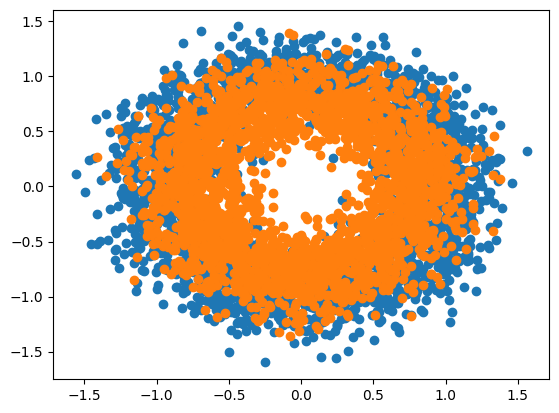

In [85]:
#plot then in two diffrent colors
plt.scatter(X_0[0],X_0[1])
plt.scatter(X_1[0],X_1[1])
plt.show()